In [20]:
import numpy as np
import matplotlib.pyplot as plt
from quantecon import LinearStateSpace
import random
from scipy.stats import norm
class Plot:
    def __init__(self,
                 ϕ_1=0.5,
                 ϕ_2=-0.2,
                 ϕ_3=0,
                 ϕ_4=0.5,
                 σ=0.1,
                 sample_size=20,
                 ymin=-0.8,
                 ymax=1.25,
                 X=np.ones(4)):
        
        self.ϕ_1, self.ϕ_2, self.ϕ_3, self.ϕ_4 = ϕ_1, ϕ_2, ϕ_3, ϕ_4
        self.σ = σ
        self.sample_size = sample_size
        self.ymin, self.ymax = ymin, ymax
        
        A = [[self.ϕ_1, self.ϕ_2, self.ϕ_3, self.ϕ_4],
         [1,     0,     0,     0],
         [0,     1,     0,     0],
         [0,     0,     1,     0]]
        C = [[self.σ], [0], [0], [0]]
        G = [1, 0, 0, 0]
        self.ar = LinearStateSpace(A, C, G, mu_0=X)
        
    def dynamic_draw(self, T):
        """
        1. purpose of this function: This function generates draws over time starting from x0.
        2. T: T is an array consisting of time slots T1, T2, ..., we are interested in.
        """
        self.T = T
        ar = self.ar
        
        fig, ax = plt.subplots(figsize=(8, 5))
        ax.grid(alpha=0.4)
        ax.set_ylim(self.ymin, self.ymax)
        ax.set_ylabel(r'$y_t$', fontsize=12)
        ax.set_xlabel(r'time', fontsize=12)
        
        for t in self.T:
            ax.vlines(t, -1.5, 1.5)
            S = []
            
            for j in range(len(self.T)):
                S.append(f'$T_{j}$')
                
            ax.set_xticks(self.T)
            ax.set_xticklabels(S)
            
            sample = []
            for i in range(self.sample_size):
                rcolor = random.choice(('c', 'g', 'b', 'k'))
                x, y = ar.simulate(ts_length=t+15)
                y = y.flatten()
                
                ax.plot(y, color=rcolor, lw=1, alpha=0.5)
                ax.plot((t,), (y[t],), 'ko', alpha=0.5)
                
                sample.append(y[t])
                
        plt.show()
        
    def hist_h(self, T):
        """
        1. purpose of this function: This function capture the histogram of the distribution at the period of T.
        2. T: T is an array consisting of time slots we are interested in.
        """
        self.T = T
        ar = self.ar
        
        fig, ax = plt.subplots(figsize=(8, 4))
        ax.set_xlim(self.ymin, self.ymax)
        ax.set_xlabel(r'$y_t$', fontsize=16)
        
        x, y = ar.replicate(self.T, self.sample_size)
        μ_x, μ_y, σ_x, σ_y = ar.stationary_distributions()
        f_y = norm(loc=float(μ_y), scale=float(np.sqrt(σ_y)))
        y = y.flatten()
        
        ax.hist(y, bins=50, density=True, alpha=0.4)
        ygrid = np.linspace(self.ymin, self.ymax, 150)
        
        ax.plot(ygrid, f_y.pdf(ygrid), 'k-', lw=2, alpha=0.8, label='true density')
        ax.legend()
        
        plt.show()

In [13]:
p = Plot(X=np.array([1,1,1,1]))

In [23]:
T = np.array([20, 30])

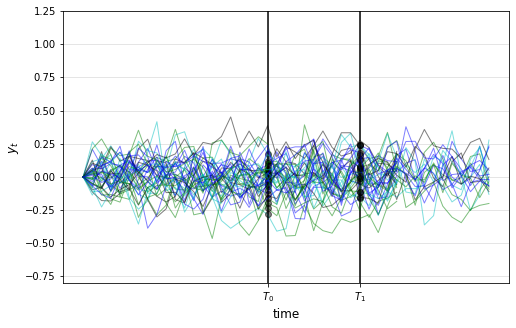

CPU times: user 287 ms, sys: 4.82 ms, total: 292 ms
Wall time: 291 ms


In [24]:
%time p.dynamic_draw(T)

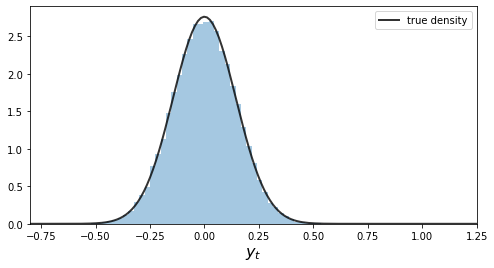

CPU times: user 9.94 s, sys: 36.5 ms, total: 9.98 s
Wall time: 9.09 s


In [25]:
p2 = Plot(sample_size=50_000)
T = 100
%time p2.hist_h(T)